In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
import warnings
import joblib

In [24]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [25]:
# Load the cleaned dataset
df = pd.read_csv("Network_anomaly_data.csv")

# Check the first few rows of the data
print(df.head())

# Get general information about the dataset
print(df.info())

   duration protocoltype   service flag  srcbytes  dstbytes  land  \
0         0          tcp  ftp_data   SF       491         0     0   
1         0          udp     other   SF       146         0     0   
2         0          tcp   private   S0         0         0     0   
3         0          tcp      http   SF       232      8153     0   
4         0          tcp      http   SF       199       420     0   

   wrongfragment  urgent  hot  ...  dsthostsamesrvrate  dsthostdiffsrvrate  \
0              0       0    0  ...                0.17                0.03   
1              0       0    0  ...                0.00                0.60   
2              0       0    0  ...                0.10                0.05   
3              0       0    0  ...                1.00                0.00   
4              0       0    0  ...                1.00                0.00   

   dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
0                    0.17                   

In [26]:
# Display missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvra

In [27]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Replace missing values in numerical columns with the median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Replace missing values in categorical columns with the most frequent value
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
# Display missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvra

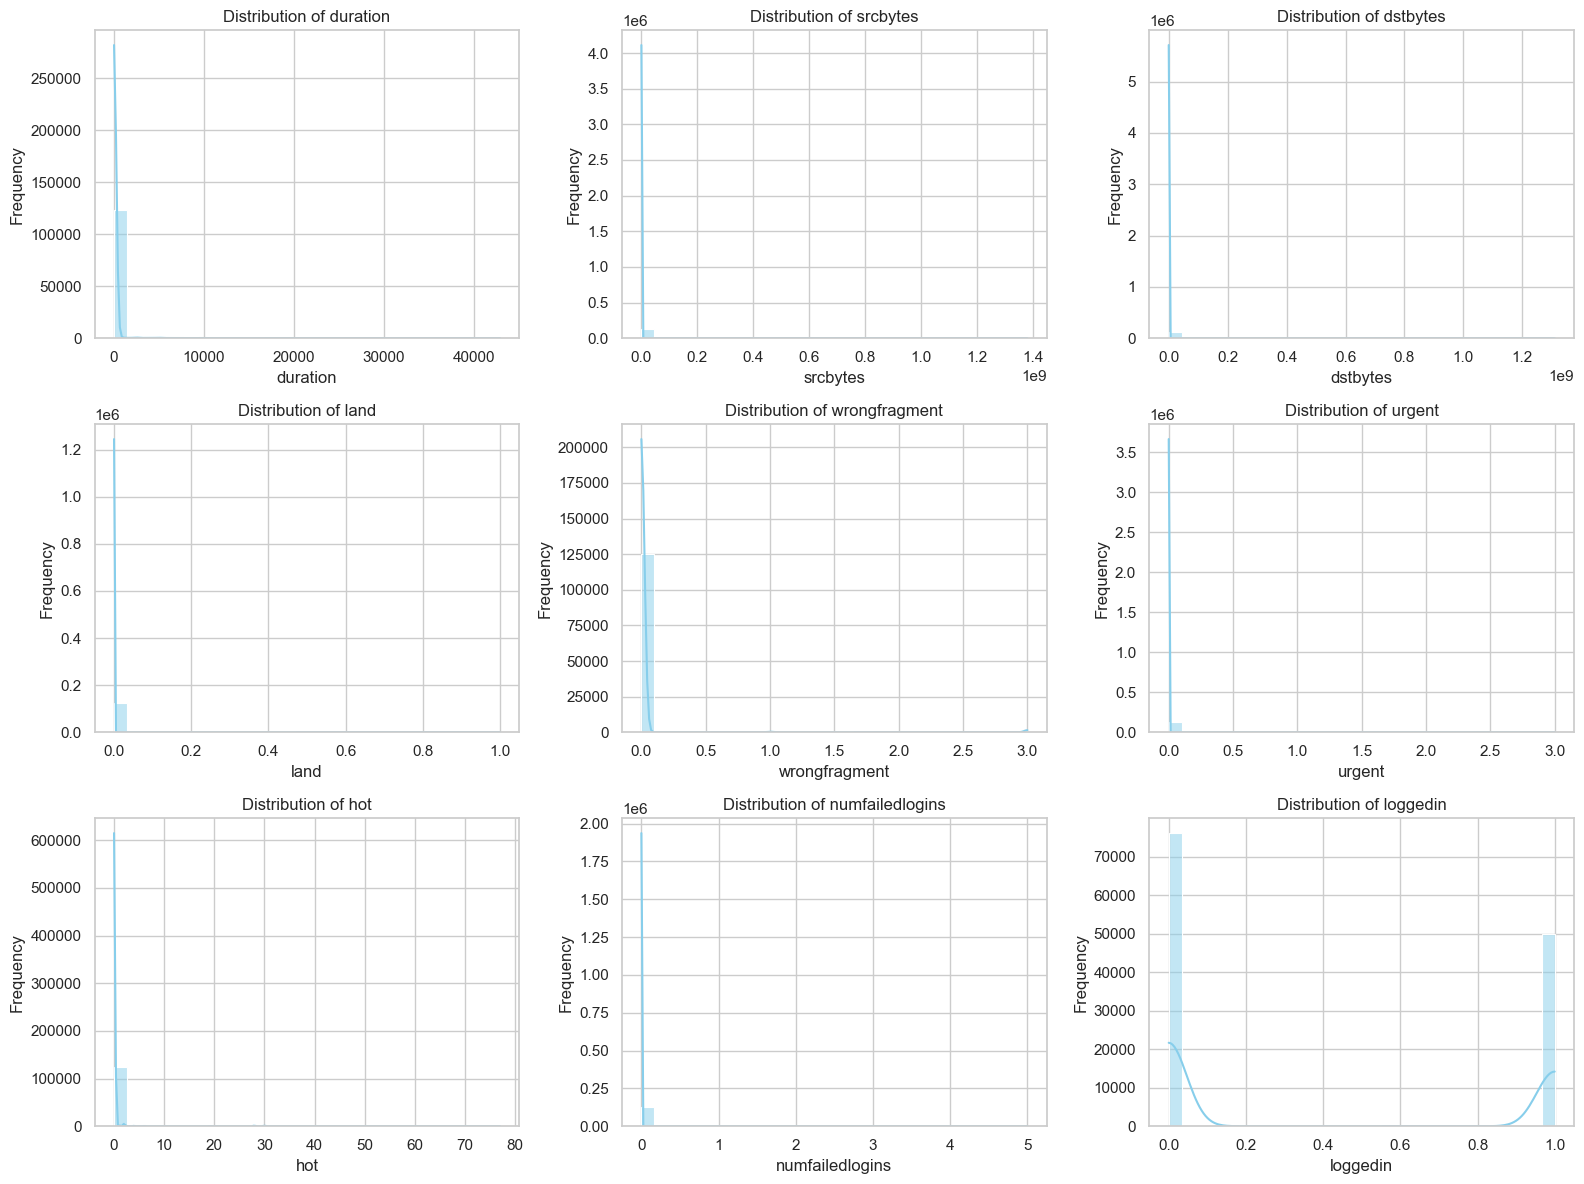

In [29]:
# Set plot style
sns.set(style="whitegrid")

# Function to plot the distribution of numeric features
def plot_feature_distributions(data, feature_columns):
    n_cols = 3
    n_rows = (len(feature_columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(16, n_rows * 4))
    
    for i, feature in enumerate(feature_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[feature], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# Select numeric columns for distribution analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plot_feature_distributions(df, numeric_columns[:9])  # Plot for the first 9 features initially


## Observations:

Features like duration, srcbytes, and dstbytes have highly skewed distributions, likely influenced by extreme outliers or infrequent high values.
Binary features such as land and urgent show a discrete distribution.
Some features, like wrongfragment, have a significant number of zero entries, indicating sparsity.


In [30]:
def plot_distributions(data):
    # Separate numeric and categorical columns
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # Plot distributions for numeric features
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color="skyblue")
        plt.title(f"Distribution of Numeric Feature: {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    # Plot distributions for categorical features
    for column in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, x=column, palette="viridis")
        plt.title(f"Distribution of Categorical Feature: {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()



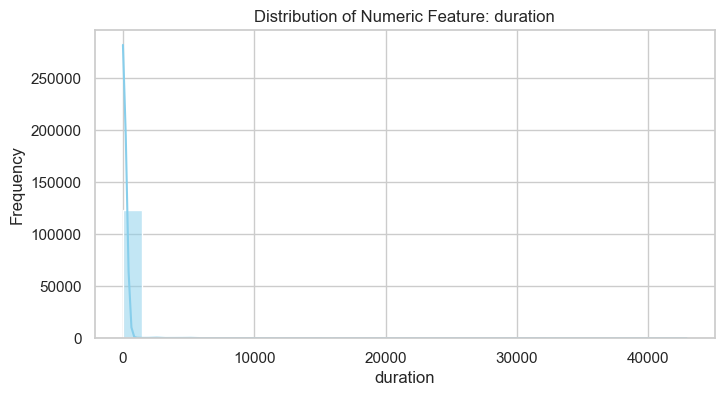

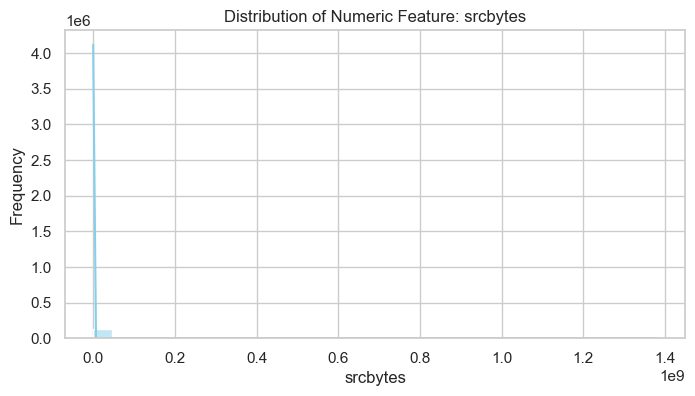

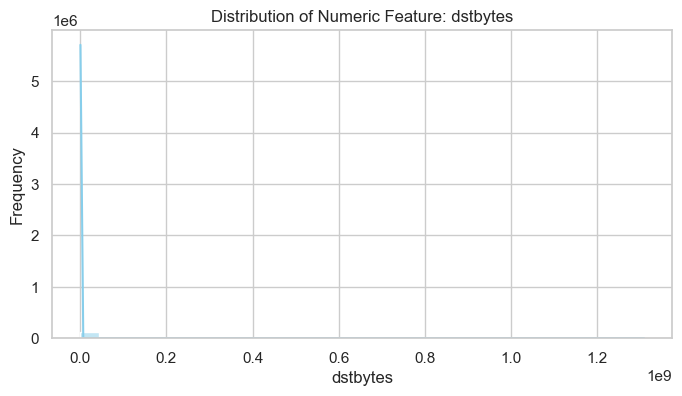

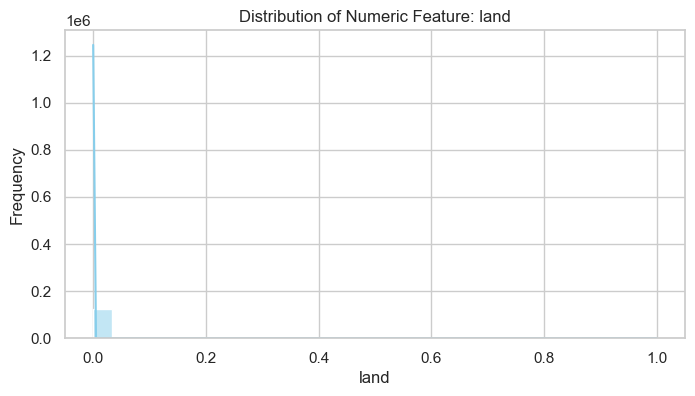

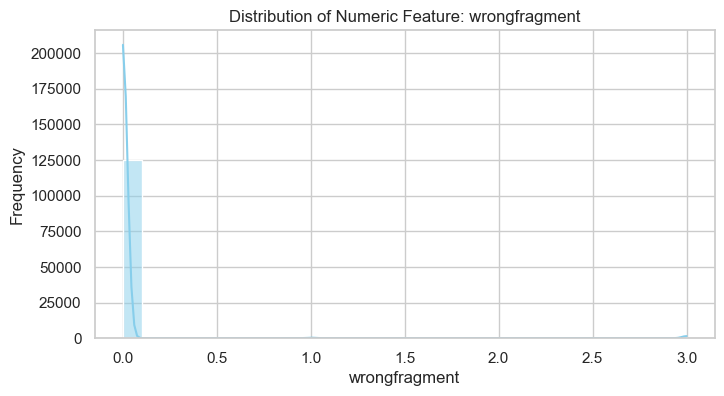

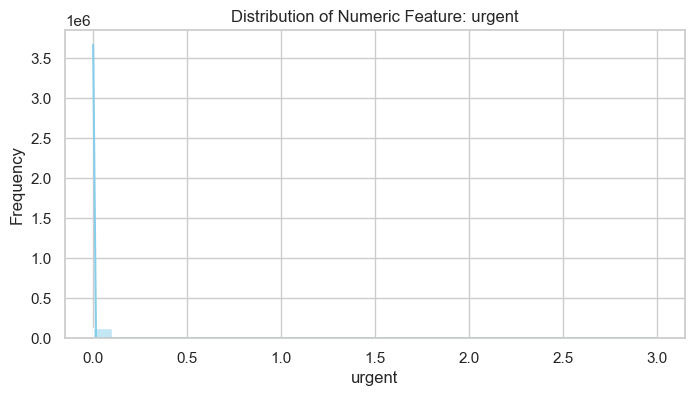

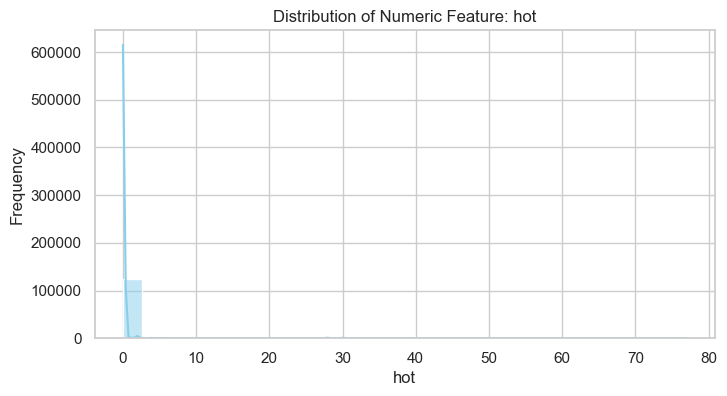

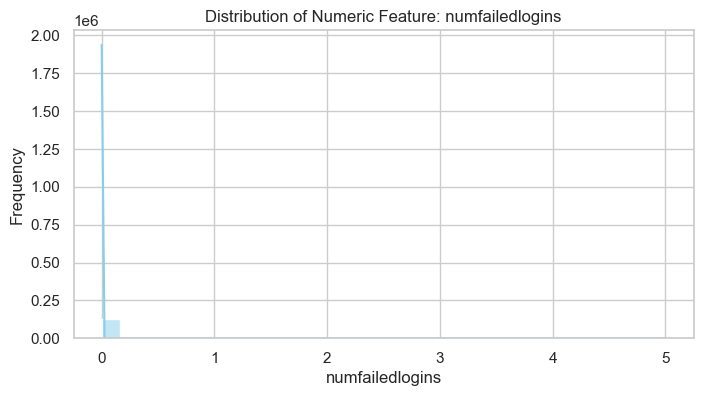

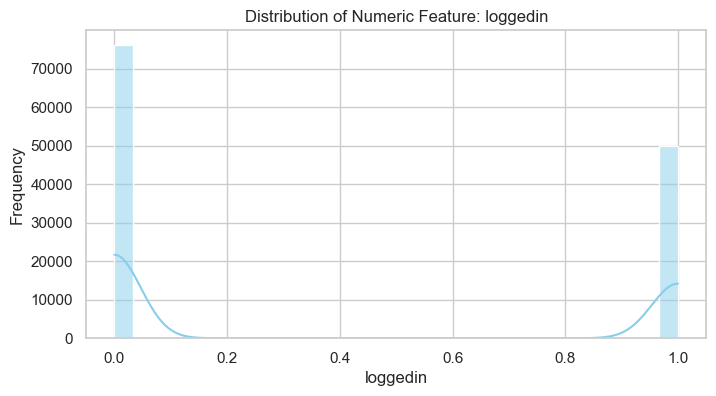

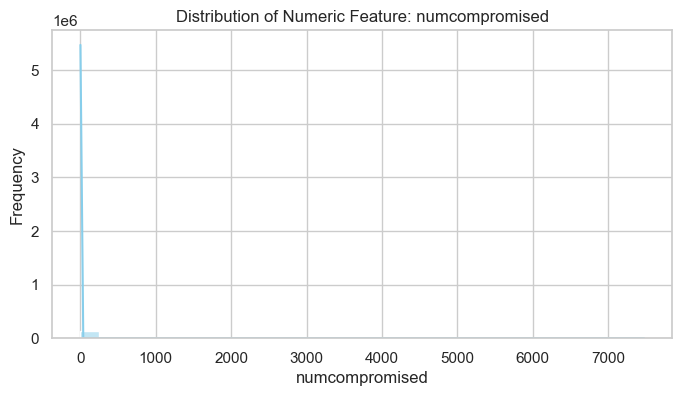

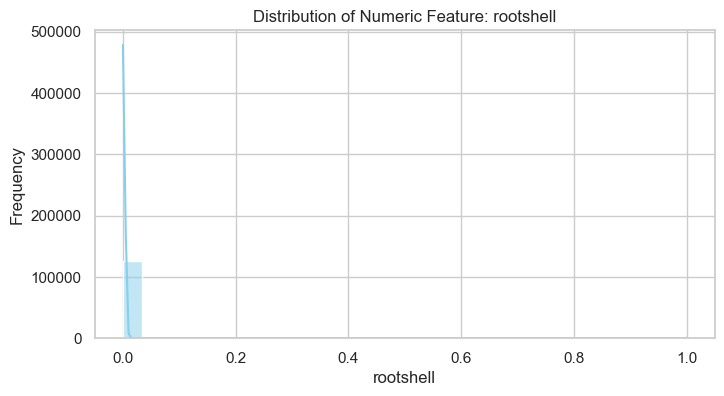

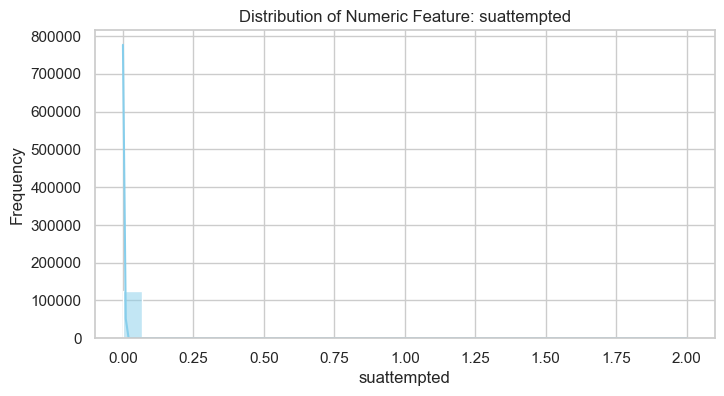

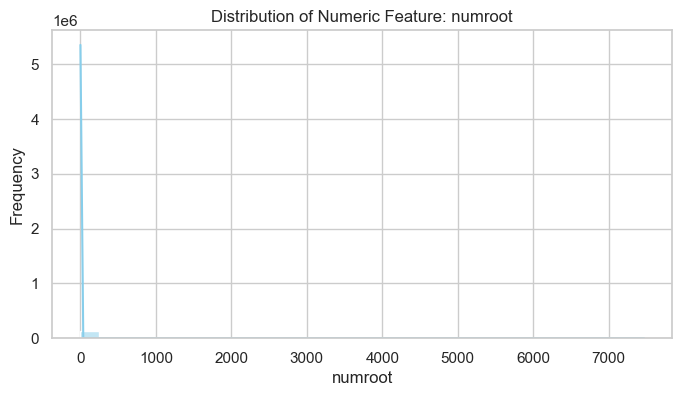

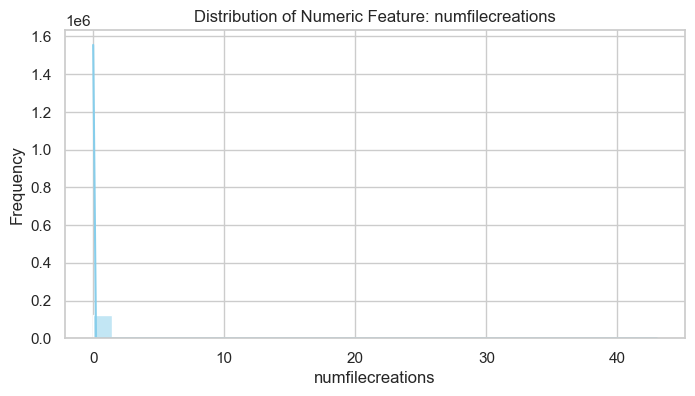

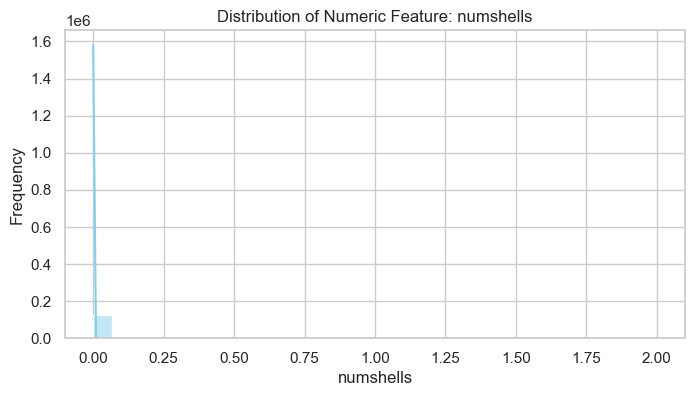

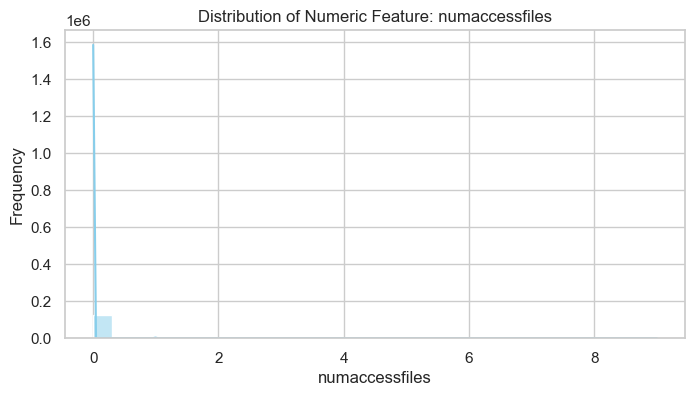

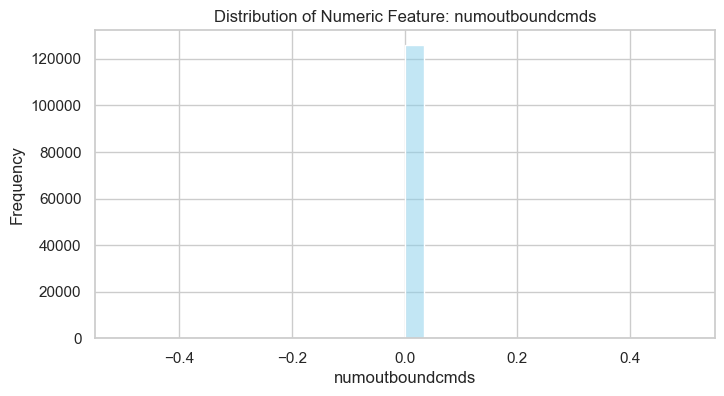

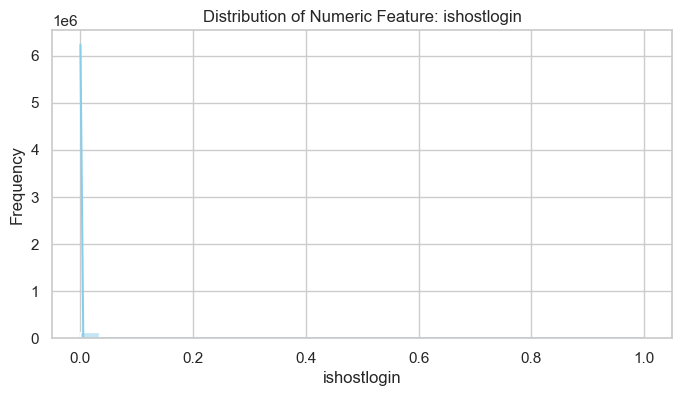

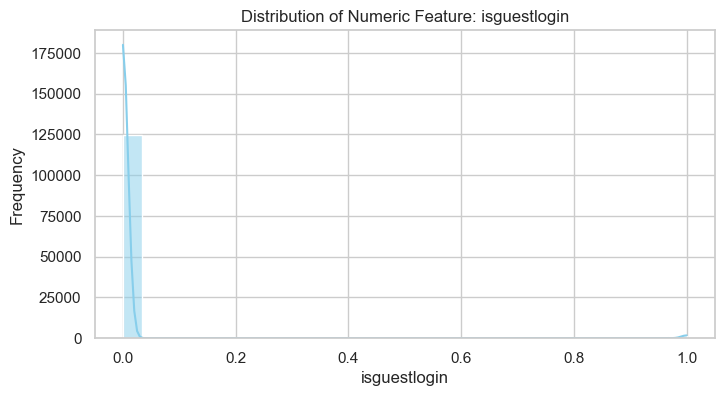

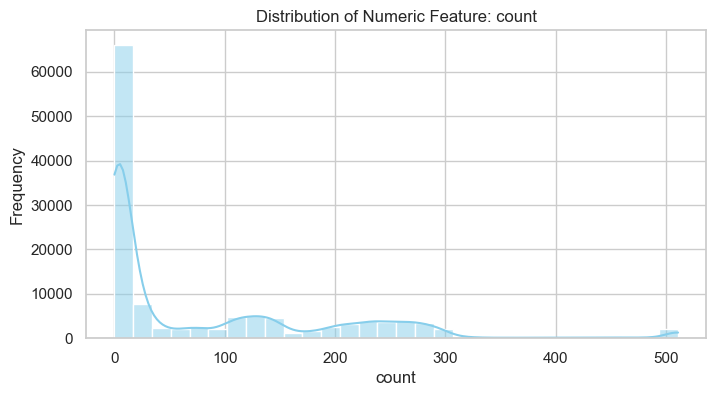

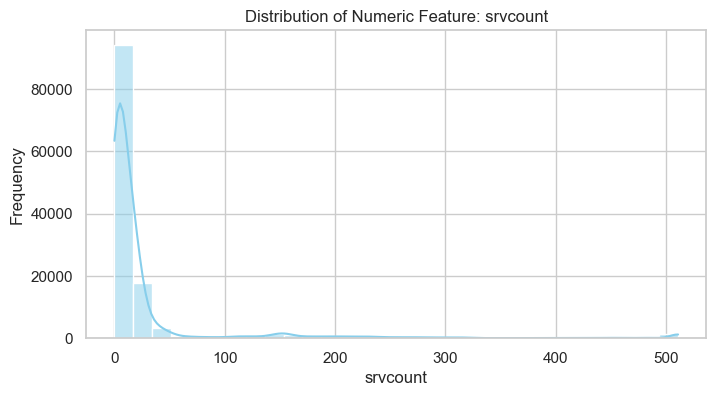

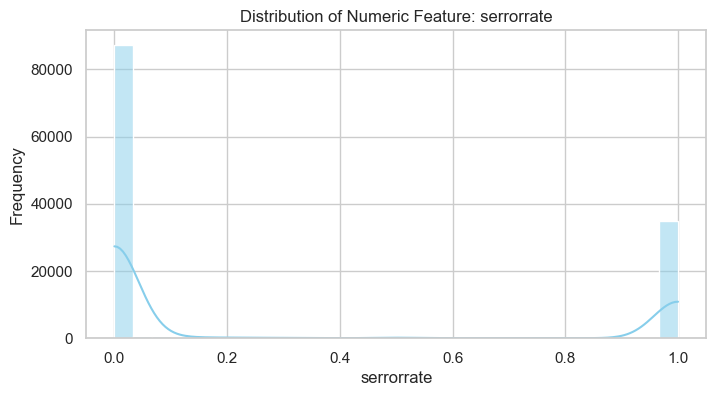

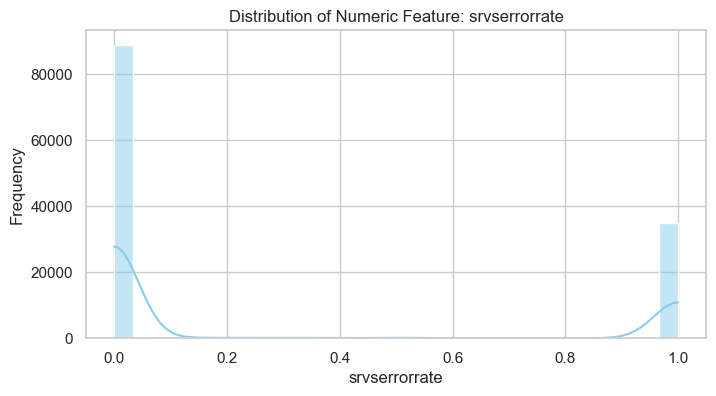

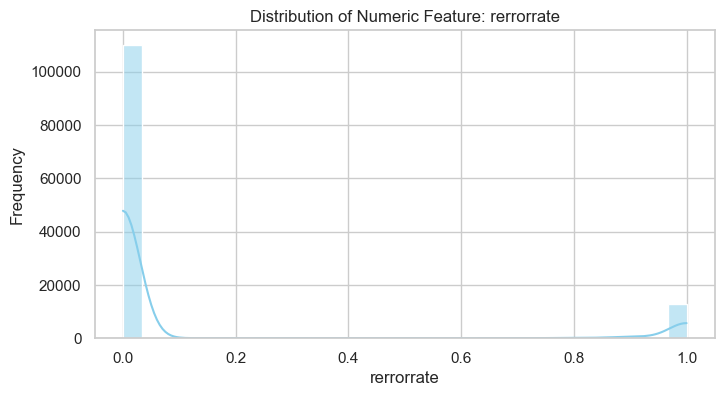

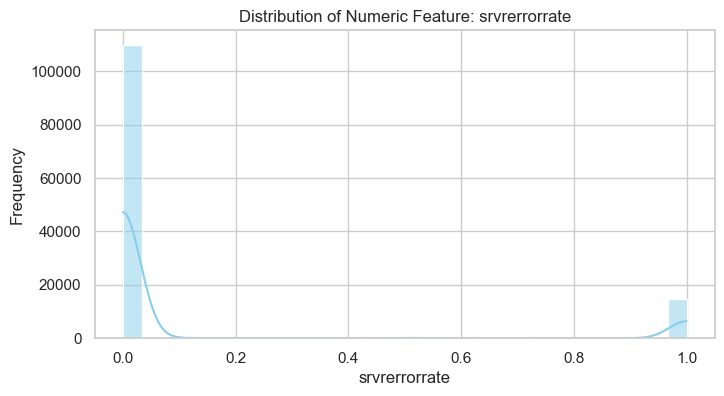

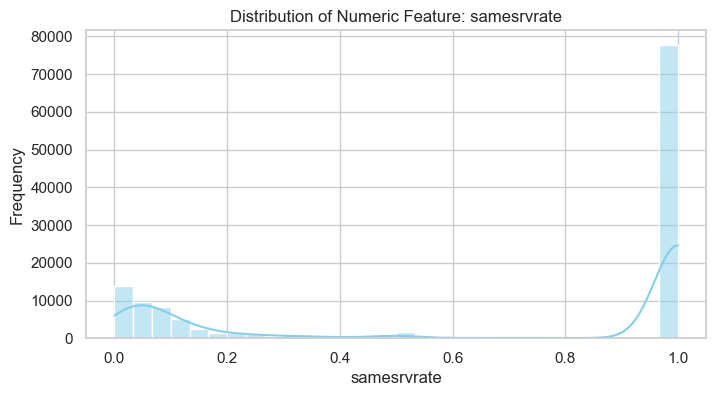

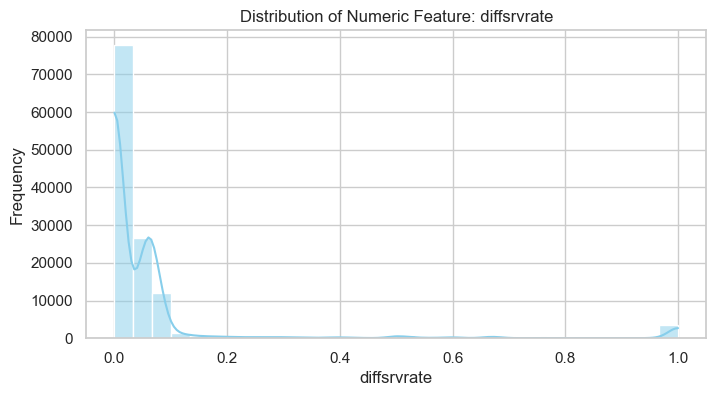

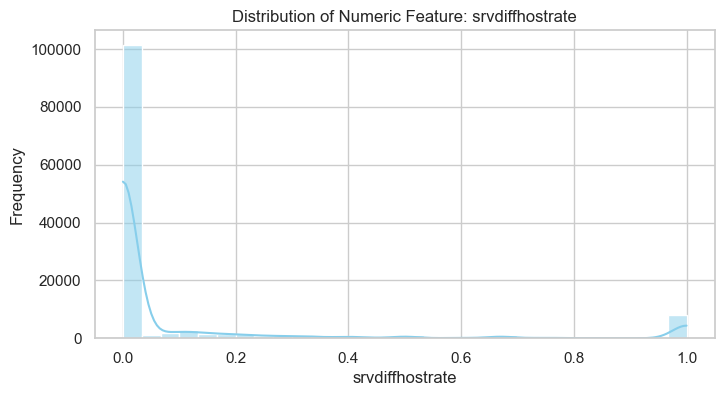

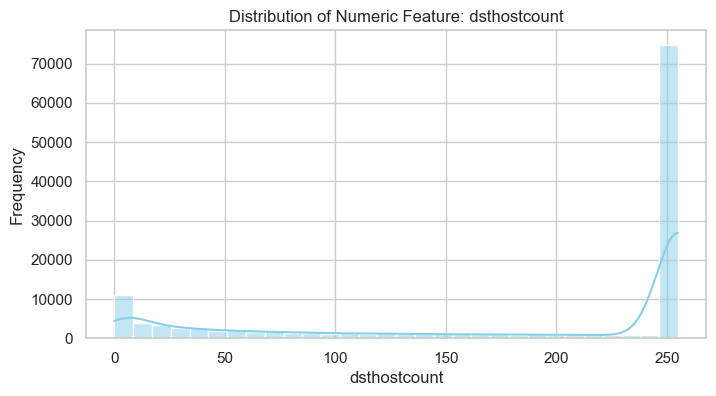

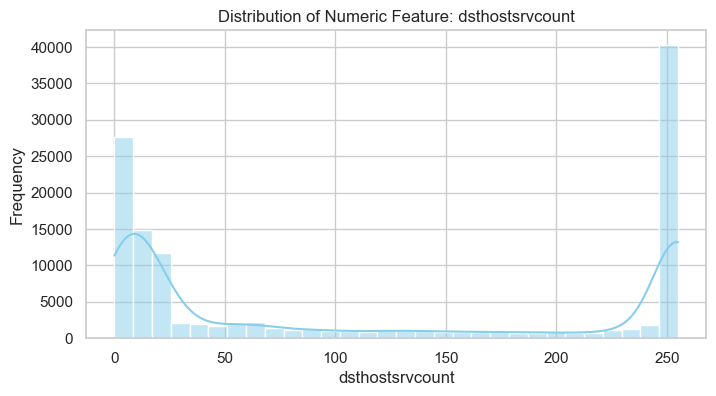

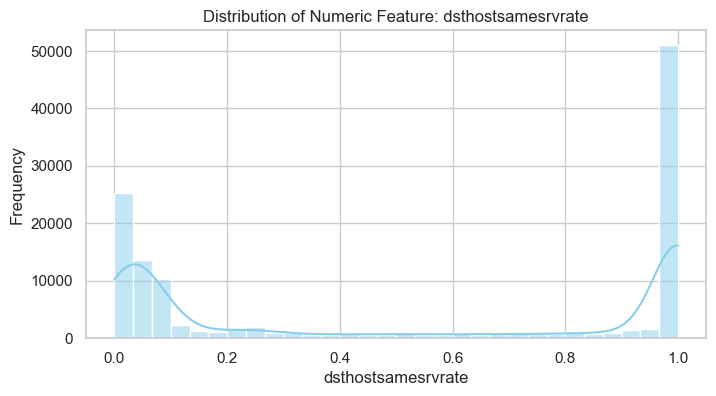

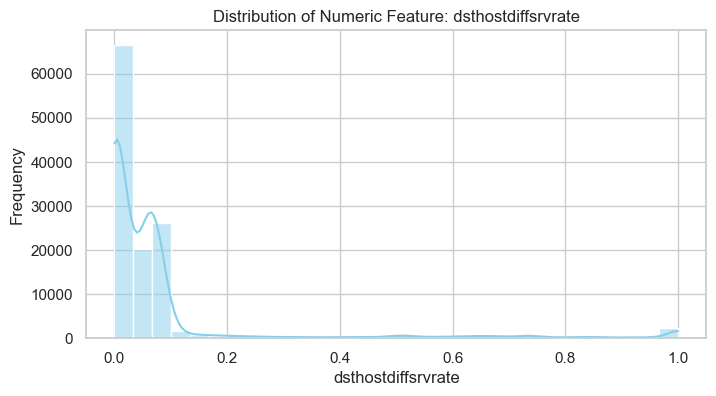

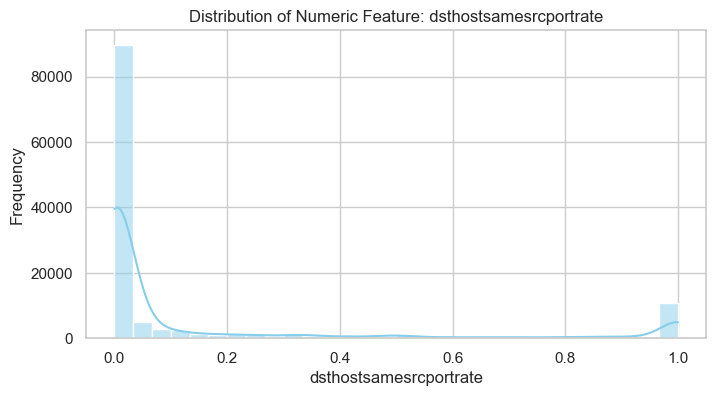

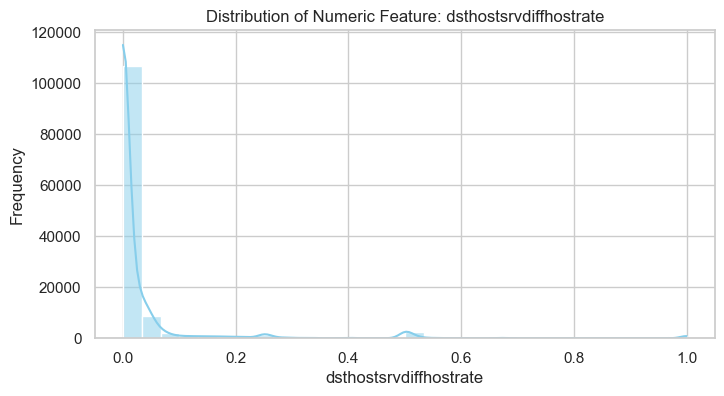

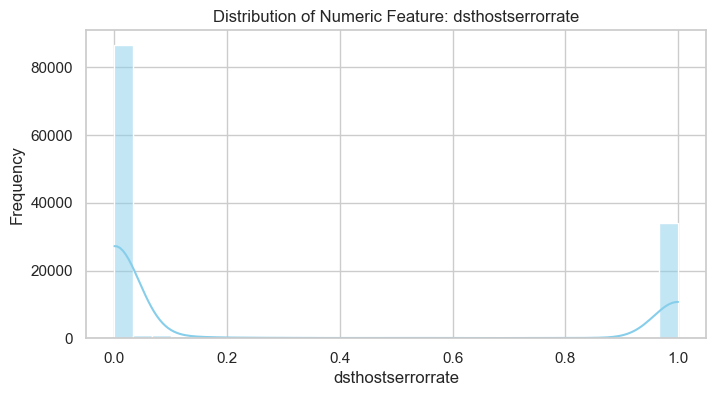

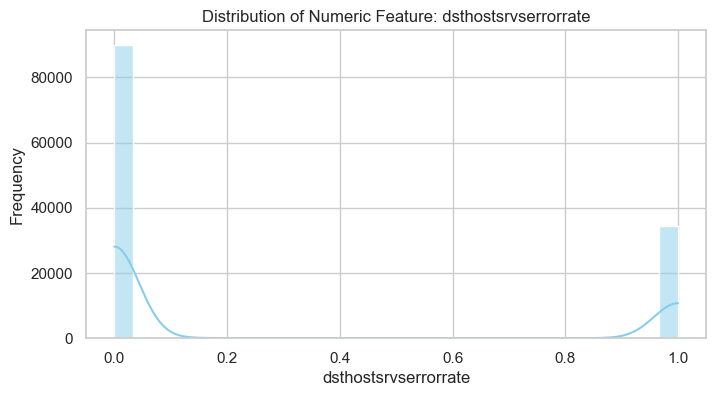

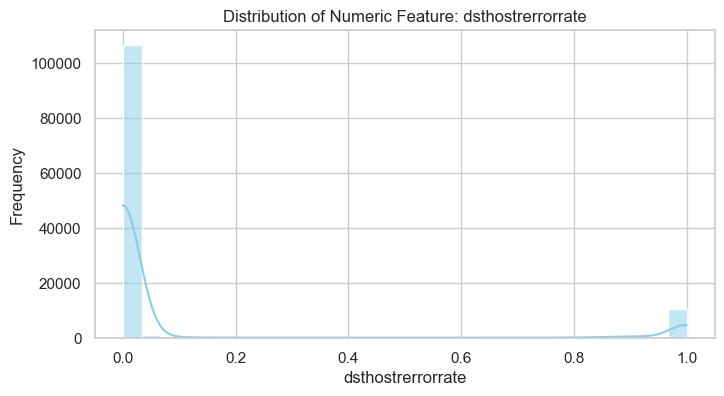

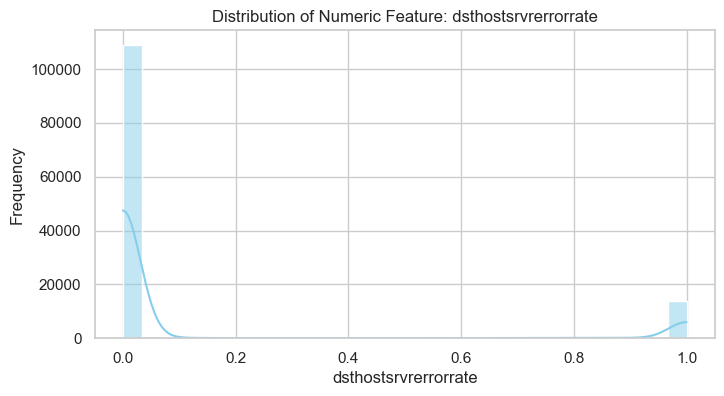

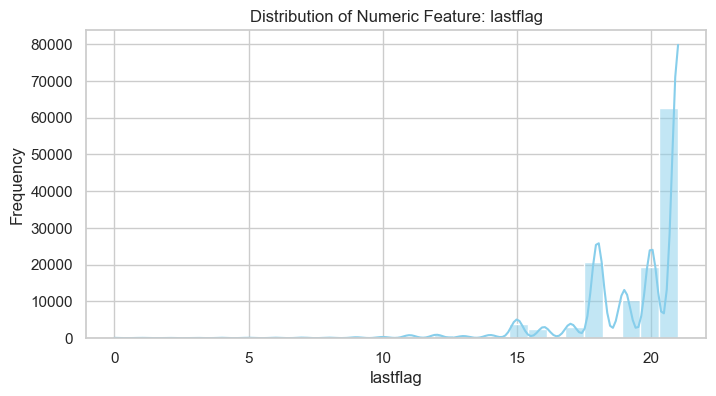

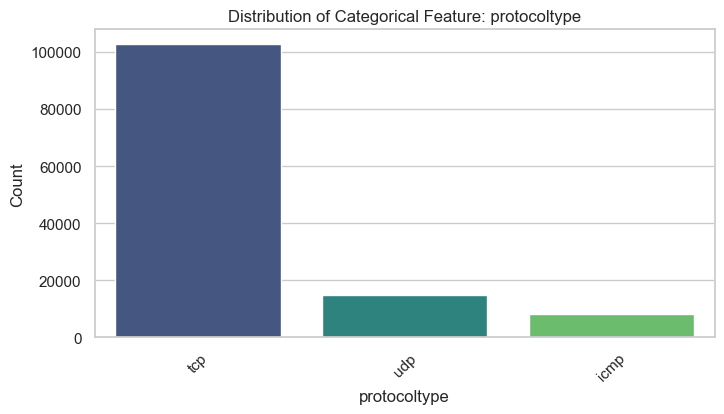

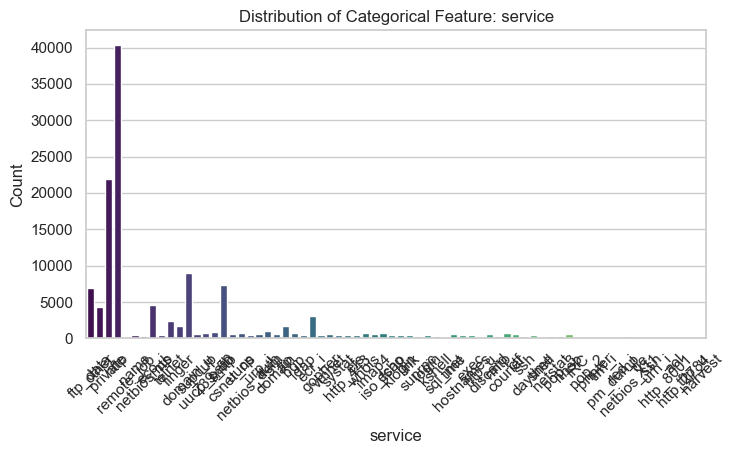

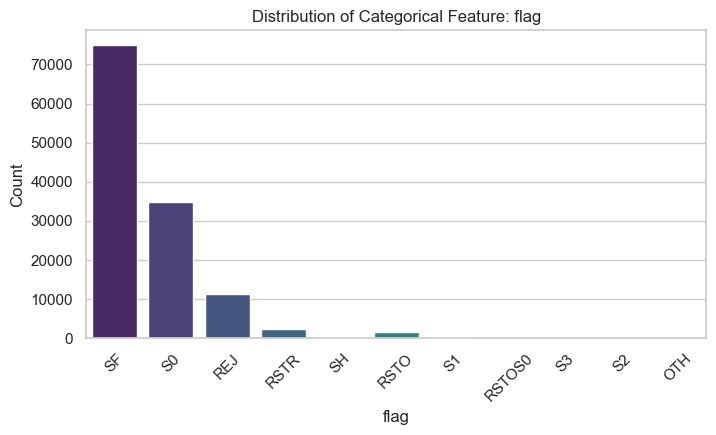

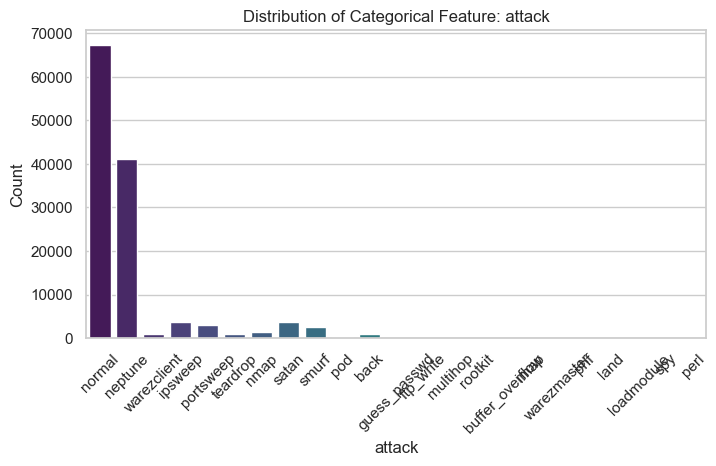

In [31]:
# Call the function to visualize all feature distributions
plot_distributions(df)

# Corelation
To identify highly correlated features in your dataset and drop the ones that are redundant, we can calculate the correlation matrix and use a threshold to decide which features to drop.

In [32]:
def correlation_analysis(data):
    # Compute the correlation matrix
    # Identify numerical columns to scale/normalize
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    corr_matrix = data[numerical_columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    # Return the correlation matrix for further analysis
    return corr_matrix

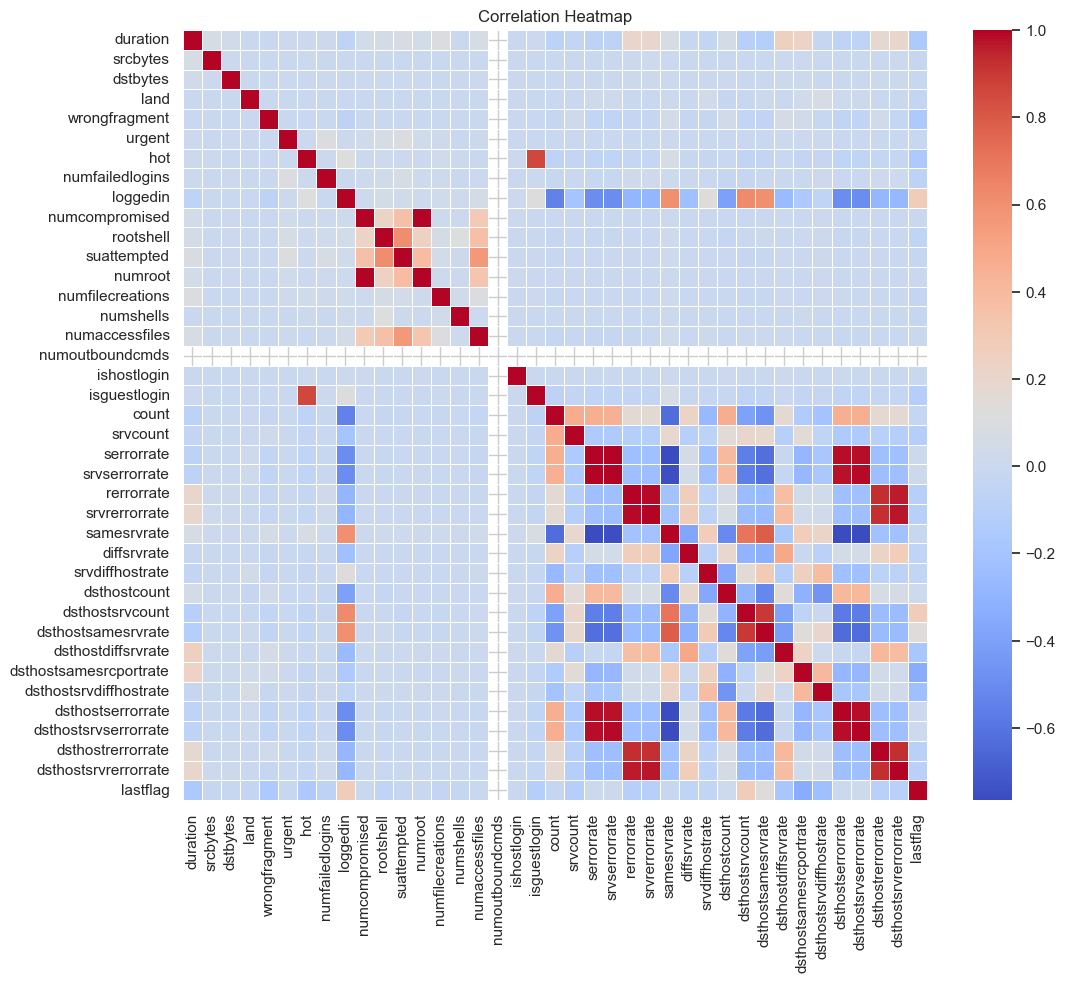

In [33]:
# Call the function for correlation analysis
correlation_matrix = correlation_analysis(df)

In [34]:
# Check for duplicates
print(f"Number of duplicates before removal: {df.duplicated().sum()}")

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of duplicates after removal: {df_cleaned.duplicated().sum()}")


Number of duplicates before removal: 0
Number of duplicates after removal: 0


In [35]:
categorical_columns = ['protocoltype', 'service', 'flag']

# Dictionary to store mappings
label_encoders = {}
label_mappings = {}

# Apply Label Encoding and store mappings
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}

# Print the mappings for each column
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}:")
    for encoded, original in mapping.items():
        print(f"  {encoded} -> {original}")
    print()

# Display the first few rows of the dataset
print("\nEncoded Dataset:")
print(df.head())

Mapping for protocoltype:
  0 -> icmp
  1 -> tcp
  2 -> udp

Mapping for service:
  0 -> IRC
  1 -> X11
  2 -> Z39_50
  3 -> aol
  4 -> auth
  5 -> bgp
  6 -> courier
  7 -> csnet_ns
  8 -> ctf
  9 -> daytime
  10 -> discard
  11 -> domain
  12 -> domain_u
  13 -> echo
  14 -> eco_i
  15 -> ecr_i
  16 -> efs
  17 -> exec
  18 -> finger
  19 -> ftp
  20 -> ftp_data
  21 -> gopher
  22 -> harvest
  23 -> hostnames
  24 -> http
  25 -> http_2784
  26 -> http_443
  27 -> http_8001
  28 -> imap4
  29 -> iso_tsap
  30 -> klogin
  31 -> kshell
  32 -> ldap
  33 -> link
  34 -> login
  35 -> mtp
  36 -> name
  37 -> netbios_dgm
  38 -> netbios_ns
  39 -> netbios_ssn
  40 -> netstat
  41 -> nnsp
  42 -> nntp
  43 -> ntp_u
  44 -> other
  45 -> pm_dump
  46 -> pop_2
  47 -> pop_3
  48 -> printer
  49 -> private
  50 -> red_i
  51 -> remote_job
  52 -> rje
  53 -> shell
  54 -> smtp
  55 -> sql_net
  56 -> ssh
  57 -> sunrpc
  58 -> supdup
  59 -> systat
  60 -> telnet
  61 -> tftp_u
  62 -> tim_

In [36]:
# Identify numerical columns to scale/normalize
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Standardization: Mean = 0, Std Dev = 1
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Normalization: Scale to range [0, 1]
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

# Display the transformed datasets
print("Standardized Dataset (first 5 rows):")
print(df_standardized.head())

print("\nNormalized Dataset (first 5 rows):")
print(df_normalized.head())

Standardized Dataset (first 5 rows):
   duration  protocoltype   service      flag  srcbytes  dstbytes      land  \
0 -0.110249     -0.124706 -0.686785  0.751111 -0.007679 -0.004919 -0.014089   
1 -0.110249      2.219312  0.781428  0.751111 -0.007737 -0.004919 -0.014089   
2 -0.110249     -0.124706  1.087305 -0.736235 -0.007762 -0.004919 -0.014089   
3 -0.110249     -0.124706 -0.442083  0.751111 -0.007723 -0.002891 -0.014089   
4 -0.110249     -0.124706 -0.442083  0.751111 -0.007728 -0.004814 -0.014089   

   wrongfragment    urgent       hot  ...  dsthostsamesrvrate  \
0      -0.089486 -0.007736 -0.095076  ...           -0.782367   
1      -0.089486 -0.007736 -0.095076  ...           -1.161030   
2      -0.089486 -0.007736 -0.095076  ...           -0.938287   
3      -0.089486 -0.007736 -0.095076  ...            1.066401   
4      -0.089486 -0.007736 -0.095076  ...            1.066401   

   dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0           -0.280282   

## Explanation of Changes:

Dropping Only One Feature from Each Pair:

For each correlated pair, only the first feature (i.e., pair[0]) is added to the correlated_features set, ensuring that only one feature from each correlated pair is dropped.

Set Data Structure for Features to Drop:

A set is used to ensure that each feature is only added once, even if it appears in multiple correlated pairs.

In [37]:
# Select only numeric fields
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set a threshold for correlation (e.g., 0.9)
threshold = 0.9

# Initialize a list to store correlated column pairs
correlated_pairs = []

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check if correlation is above the threshold
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2))

# Print correlated column pairs
if correlated_pairs:
    print("Highly correlated column pairs (correlation > 0.9):")
    for pair in correlated_pairs:
        print(f"{pair[0]} and {pair[1]}")
else:
    print("No highly correlated column pairs found.")

# Initialize a set to keep track of features to drop
correlated_features = set()

# Keep only the first feature of each correlated pair (drop the second one)
for pair in correlated_pairs:
    correlated_features.add(pair[0])  # Add only the first feature to the drop list

# Drop the selected features from the original dataframe
df = df.drop(columns=correlated_features)

# Output the dropped features
print(f"\nDropped features due to high correlation: {correlated_features}")


Highly correlated column pairs (correlation > 0.9):
numroot and numcompromised
srvserrorrate and serrorrate
srvrerrorrate and rerrorrate
dsthostserrorrate and serrorrate
dsthostserrorrate and srvserrorrate
dsthostsrvserrorrate and serrorrate
dsthostsrvserrorrate and srvserrorrate
dsthostsrvserrorrate and dsthostserrorrate
dsthostrerrorrate and rerrorrate
dsthostrerrorrate and srvrerrorrate
dsthostsrvrerrorrate and rerrorrate
dsthostsrvrerrorrate and srvrerrorrate
dsthostsrvrerrorrate and dsthostrerrorrate

Dropped features due to high correlation: {'numroot', 'dsthostserrorrate', 'srvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'srvrerrorrate', 'dsthostsrvserrorrate'}


In [38]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,attack,lastflag
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,normal,21


# Feature Engineering Steps

Interaction Features: Combine numerical features to create interaction terms.

Aggregated Features: Create summary statistics like the mean, sum, or count of certain groups of features.

Polynomial Features: Introduce non-linear relationships between features by applying polynomial transformation.

Let's focus on feature engineering by combining features in a few creative ways.

In [39]:
# Creating Interaction Features (combining numerical features)
df['src_dst_bytes_interaction'] = df['srcbytes'] * df['dstbytes']  # Interaction between source and destination bytes
df['num_failed_logins_hot_interaction'] = df['numfailedlogins'] * df['hot']  # Interaction between failed logins and 'hot' indicator
df['num_compromised_su_interaction'] = df['numcompromised'] * df['suattempted']  # Interaction between compromised and su attempt

# Aggregated Features: Summary statistics over groups of features
df['total_data_transfer'] = df['srcbytes'] + df['dstbytes']  # Total data transferred
df['total_access_operations'] = df['numfilecreations'] + df['numshells'] + df['numaccessfiles']  # Total access-related operations

# Encode the 'attack' column as binary: 'normal' = 0, others = 1
df['attack_binary'] = df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

# Drop any features that you may not need
df = df.drop(columns=['srcbytes', 'dstbytes', 'attack'])  # Dropping original srcbytes and dstbytes if needed


In [40]:
df.head()

,duration,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,src_dst_bytes_interaction,num_failed_logins_hot_interaction,num_compromised_su_interaction,total_data_transfer,total_access_operations,attack_binary
0,0,1,20,9,0,0,0,0,0,0,...,0.03,0.17,0.00,20,0,0,0,491,0,0
1,0,2,44,9,0,0,0,0,0,0,...,0.60,0.88,0.00,15,0,0,0,146,0,0
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,19,0,0,0,0,0,1
3,0,1,24,9,0,0,0,0,0,1,...,0.00,0.03,0.04,21,1891496,0,0,8385,0,0
4,0,1,24,9,0,0,0,0,0,1,...,0.00,0.00,0.00,21,83580,0,0,619,0,0


# Key Feature Engineering Techniques Applied:

Interaction Features:

src_dst_bytes_interaction: Multiplying source and destination bytes.

num_failed_logins_hot_interaction: Multiplying failed login attempts and the 'hot' indicator.

num_compromised_su_interaction: Multiplying the number of compromised conditions and su attempts.

Aggregated Features:

total_data_transfer: Sum of srcbytes and dstbytes.

total_access_operations: Sum of file creations, shells, and access file operations.

Polynomial Features: Polynomial transformations (degree 2) were applied to all numeric features to introduce interaction terms and squared terms, which can help capture more complex relationships between features.

Outcome:
New interaction features are added, potentially revealing hidden patterns between features.
Polynomial features are added, enriching the dataset with higher-order terms.
The final dataset is saved as Network_anomaly_data_feature_engineered_with_interactions.csv.

In [41]:
# Feature and target separation
X = df.drop(columns=['attack_binary'])  # Features
y = df['attack_binary']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Display the shapes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (88181, 38)
Testing features shape: (37792, 38)
Training target shape: (88181,)
Testing target shape: (37792,)


In [42]:
# 3. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Accuracy: 0.9994443268416596
ROC-AUC: 0.9999978162409968


In [43]:
# Evaluation using classification report for better understanding of model performance
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20203
           1       1.00      1.00      1.00     17589

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



In [44]:
# Save the trained model
joblib.dump(rf, "random_forest_model.joblib")
print("Model saved successfully.")

Model saved successfully.


In [45]:
# Load the model
rf_loaded = joblib.load("random_forest_model.joblib")
print("Model loaded successfully.")

# Use the loaded model for prediction
y_pred_loaded = rf_loaded.predict(X_test)
print(f"Accuracy of loaded model: {accuracy_score(y_test, y_pred_loaded)}")

Model loaded successfully.
Accuracy of loaded model: 0.9994443268416596
